In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import RFE
data = pd.read_csv('Updated_data.csv')
 
# Suppressing the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

# Defining the feature columns and target variable
f_cols = ['admission_type_id','discharge_disposition_id','admission_source_id','num_procedures','time_in_hospital','number_inpatient','num_lab_procedures','num_medications','number_diagnoses']
X = data[f_cols]
Y = data['readmitted']

# Fitting the logistic regression model
clf.fit(X, Y)
# Printing model evaluation metrics and coefficients
print("Model score:\n {}".format(clf.score(X,Y)))
print("Intercept:\n {}".format(clf.intercept_))
print("Coefficients:\n")
for feat, coef in zip(f_cols, clf.coef_[0]):
    print(" {:>20}: {}".format(feat, coef))

Model score:
 0.9016539489483674
Intercept:
 [-2.97383759]
Coefficients:

    admission_type_id: -0.013426934680121709
 discharge_disposition_id: 0.023550273436540037
  admission_source_id: -0.004444282375248587
       num_procedures: 0.009060992280210229
     time_in_hospital: 0.015658594563710205
     number_inpatient: 0.35601996369072936
   num_lab_procedures: -0.0005479713519149676
      num_medications: 0.0024713377595248897
     number_diagnoses: 0.05694370517658521


In [95]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Creating and fitting the logistic regression model
clf = linear_model.LogisticRegression()
clf.fit(X_train, Y_train)
# Printing model scores against training and test data
print("Score against training data: {}".format(clf.score(X_train, Y_train)))
print("Score against test data: {}".format(clf.score(X_test, Y_test)))

Score against training data: 0.901806033021837
Score against test data: 0.9010457010069713


In [96]:
# Check unique values in 'readmitted' column again
print("Unique values in 'readmitted' :", data['readmitted'].unique())
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

Unique values in 'readmitted' : [0 1]


In [97]:
from sklearn import feature_selection

In [98]:
# Redefine df as df_cat
data = data_cat
# Create a logistic regression model
model = linear_model.LogisticRegression()
# Define the feature matrix X0 and the target variable Y0
X0 = data.loc[:, data.columns != 'readmitted']
Y0 = data['readmitted']
# Initialize the RFE selector with a logistic regression model and select 15 featur
selector = feature_selection.RFE(model, n_features_to_select=10, step=2)
# Fit the selector to the data
selector = selector.fit(X0, Y0)
# Get the selected features based on the support_ attribute of the selector
selected_features = X0.loc[:, selector.support_]
# Print the selected features
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))

Selected features:
age_[10-20),
medical_specialty_Endocrinology,
medical_specialty_Gynecology,
medical_specialty_Hematology,
medical_specialty_Hematology/Oncology,
medical_specialty_InfectiousDiseases,
medical_specialty_Neurology,
medical_specialty_Otolaryngology,
medical_specialty_Surgery-Neuro,
pioglitazone_Down


In [99]:
# Selecting features for the classifier
s_cols = ['admission_type_id','discharge_disposition_id','admission_source_id','num_procedures',
          'time_in_hospital','number_inpatient','num_lab_procedures','num_medications','number_diagnoses'
           ,'age','medical_specialty','pioglitazone',]

In [100]:
# Assigning selected features to X
X = selected_features
# Assigning the target variable 'readmitted' to Y
Y = data['readmitted']

In [101]:
# Splitting the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)

In [102]:
# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

In [103]:
# Fitting the classifier to the training data
clf.fit(trainX, trainY)

LogisticRegression()

In [104]:
# Predicting the target variable for the test set
predicted = clf.predict(testX)

In [105]:
# Calculating the mean hits (proportion of correctly predicted instances)
import numpy as np
mean_hits = np.mean(predicted == testY)

In [106]:
# Calculating the accuracy score
from sklearn import metrics
accuracy_score = metrics.accuracy_score(testY, predicted)

In [107]:
# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

In [108]:
# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Mean hits: 0.9042086238058352
Accuracy score: 0.9042086238058352
Cross-validation mean scores: 0.9016539563532712


In [109]:
def classify_for_threshold(clf, testX, testY, t):
    # Predicting probabilities for the positive class
    prob_data = pd.DataFrame(clf.predict_proba(testX)[:, 1])
    
    # Classifying based on the specified threshold
    prob_data['predict'] = np.where(prob_data[0] >= t, 1, 0)
    
    # Adding the actual labels
    prob_data['actual'] = testY
    
    # Creating a cross-tabulation of predicted vs. actual labels
    return pd.crosstab(prob_data['actual'], prob_data['predict'])

In [110]:
# Specified thresholds
thresholds = [0.05, 0.10, 0.20]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.05: 
predict   0     1
actual           
0.0      24  2093
1.0       3   199

Confusion Matrix for Threshold 0.1: 
predict     0   1
actual           
0.0      2107  10
1.0       202   0

Confusion Matrix for Threshold 0.2: 
predict     0  1
actual          
0.0      2108  9
1.0       202  0


AUC = 0.5170563874936308


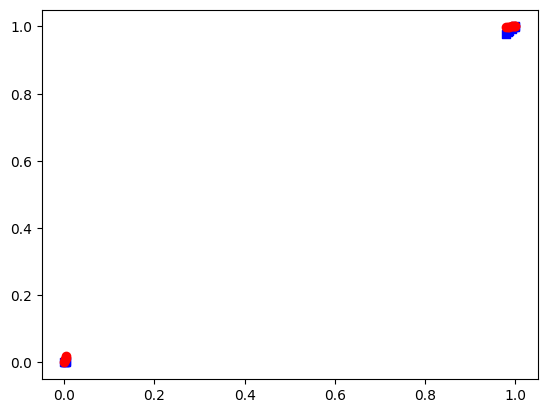

In [111]:
# Predicting probabilities for the positive class
import matplotlib.pyplot as plt
prob = np.array(clf.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score


# Define feature columns and target variable
f_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'num_procedures',
          'time_in_hospital', 'number_inpatient', 'num_lab_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_diagnoses', 'rosiglitazone_Steady',
          'rosiglitazone_Up', 'insulin_Down', 'insulin_No', 'insulin_Steady', 'insulin_Up',
          'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes']
X = data[f_cols]
Y = data['readmitted']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

# Train your logistic regression model
clf = LogisticRegression()
clf.fit(X_train_resampled, Y_train_resampled)

# Make predictions
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy of the oversampled logistic regression model:", accuracy)


Accuracy of the oversampled logistic regression model: 0.6626646010844307


In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision
precision = precision_score(Y_test, predictions)

# Calculate recall
recall = recall_score(Y_test, predictions)

# Calculate F1-score
f1 = f1_score(Y_test, predictions)

# Calculate AUC
probabilities = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, probabilities)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)


Accuracy: 0.6626646010844307
Precision: 0.1452353616532721
Recall: 0.5
F1-score: 0.22508896797153025
AUC: 0.634143392217393


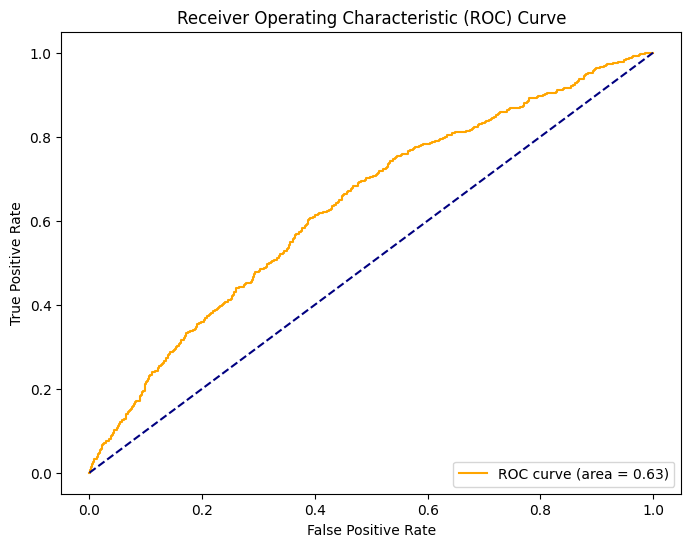

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for the positive class
probabilities = clf.predict_proba(X_test)[:, 1]

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(Y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
